<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia_eda_analysis/blob/main/EDA_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_8.xlsx',index_col=0)

In [14]:
df.head(n=3)

,Gender,Age,Age_Group,Weight,DM_Type2,OP,Chronic_Diseases,Total_Number_of_Chronic_Diseases,Total_Duration_of_Chronic_Diseases,Total_Duration_of_HT,...,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
Name,,,,,,,,,,,,,,,,,,,,,
beyzanur 0,M,74.0,AGE 60-80,88.0,1,1.0,"DM_Type2, KAH",3,5.0,5.0,...,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.000000,27.8,0
beyzanur 1,M,62.0,AGE 60-80,105.0,0,0.0,NaN,0,0.0,0.0,...,not working,0,49.0,12.1,1.42,47.0,1.38,1.122709,35.5,1
beyzanur 2,M,65.0,AGE 60-80,89.0,0,0.0,NaN,0,0.0,0.0,...,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.964912,31.2,0


In [19]:
df["OP"] = df["OP"].astype('Int64')

In [20]:
df.OP.value_counts()

,count
OP,
0,3335
1,1680


In [21]:
df.OP.isnull().sum()

np.int64(1)

In [24]:
df["OP"] = df["OP"].fillna(0)

In [26]:
df.OP.value_counts()

,count
OP,
0,3336
1,1680


In [28]:
df["Waist_Hip_Ratio"].round(decimals=2)

,Waist_Hip_Ratio
Name,
beyzanur 0,1.00
beyzanur 1,1.12
beyzanur 2,0.96
beyzanur 3,1.03
beyzanur 4,0.97
...,...
ÖZDEN 77,0.93
ÖZDEN 78,0.93
ÖZDEN 79,0.88


In [29]:
df.drop("Total_Duration_of_HT",axis=1,inplace=True)

In [30]:
df.columns

Index(['Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Job', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [ ]:
df["Total_Duration_of_Chronic_Diseases"] = df["Total_Duration_of_Chronic_Diseases"] + df["OP"]

In [37]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_8.xlsx')

In [38]:
df['Chronic_Diseases'] = np.where(
    df["OP"] == 1,
    df["Chronic_Diseases"].astype(str) + ",OP",
    df["Chronic_Diseases"].astype(str)
)

In [39]:
df.Chronic_Diseases.value_counts()

,count
Chronic_Diseases,
nan,1738
"nan,OP",672
DM_Type2,380
Hipotiroidi,258
"DM_Type2,OP",177
...,...
"KAH, Hipotiroidi, Asthma",1
"Dyslipidemia, COPD,OP",1
"DM_Type2, Dyslipidemia, KAH, COPD,OP",1


In [40]:
df.to_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_8.xlsx',index=False)

In [6]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_8.xlsx',index_col=0)

In [13]:
df['Chronic_Diseases'] = df['Chronic_Diseases'].replace("nan,OP", "OP")

In [14]:
df.Chronic_Diseases.value_counts()

,count
Chronic_Diseases,
OP,672
DM_Type2,380
Hipotiroidi,258
"DM_Type2,OP",177
"Hipotiroidi,OP",146
...,...
"KAH, Hipotiroidi, Asthma",1
"Dyslipidemia, COPD,OP",1
"DM_Type2, Dyslipidemia, KAH, COPD,OP",1


In [15]:
df.columns

Index(['Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP', 'Chronic_Diseases',
       'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Job', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [16]:
def histog_boxplot(column):
  fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 satır, 2 sütun

  sns.histplot(column, kde=True, ax=axes[0], color='skyblue')
  axes[0].set_title(f'{column.name} (Histogram)', fontsize=14)
  axes[0].set_xlabel('Değerler', fontsize=12)
  axes[0].set_ylabel('Frekans', fontsize=12)
  axes[0].grid(axis='y', linestyle='--', alpha=0.7)

  sns.boxplot(y=column, ax=axes[1], color='lightcoral')
  axes[1].set_title(f'{column.name} (Box Plot)', fontsize=14)
  axes[1].set_ylabel('Değerler', fontsize=12)
  axes[1].grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()

  # Remove plt.show() from the function so it can be called outside
  # plt.show()

  # Return the fig and axes objects
  return fig, axes

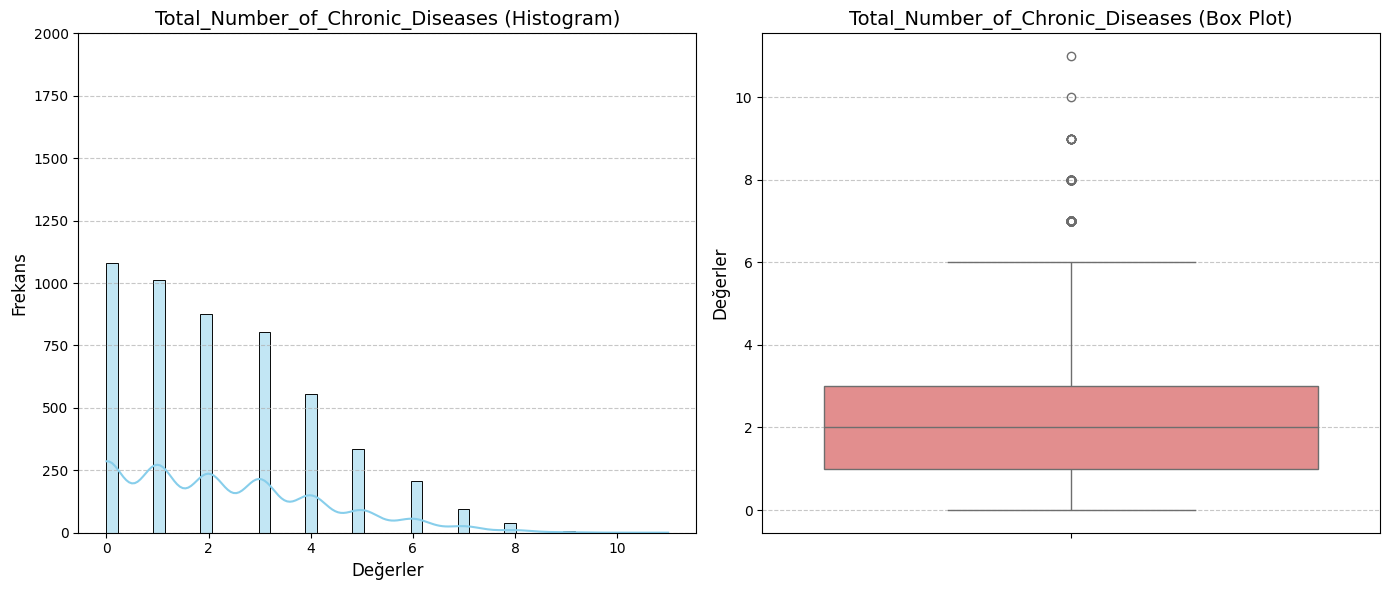

In [18]:
fig, axes = histog_boxplot(df.Total_Number_of_Chronic_Diseases)
axes[0].set_ylim(0, 2000)

plt.show()

In [20]:
df.Total_Number_of_Chronic_Diseases.describe()

,Total_Number_of_Chronic_Diseases
count,5016.000000
mean,2.272528
std,1.929488
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,11.000000


In [22]:
df.Total_Number_of_Chronic_Diseases.median()

2.0

**Outlier values are replaced with meadian values.**

In [25]:
df.loc[df["Total_Number_of_Chronic_Diseases"] > 6, "Total_Number_of_Chronic_Diseases"] = df.Total_Number_of_Chronic_Diseases.median()

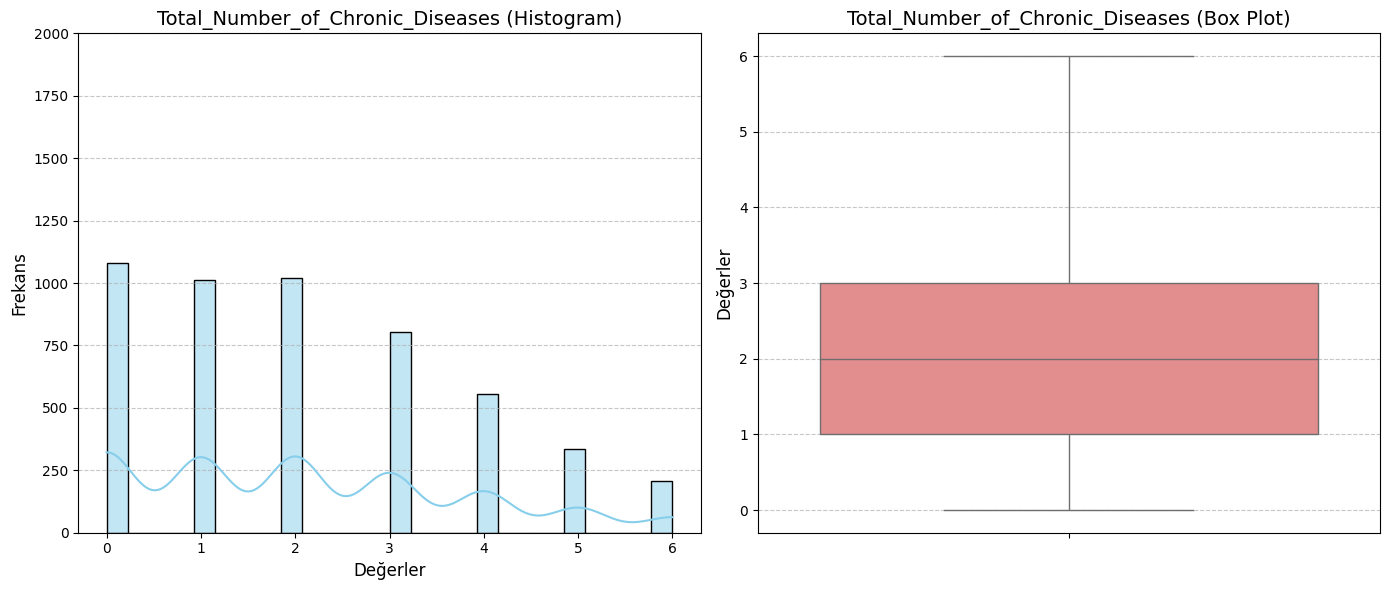

In [26]:
fig, axes = histog_boxplot(df.Total_Number_of_Chronic_Diseases)
axes[0].set_ylim(0, 2000)

plt.show()

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Number_of_Drug_Used (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Number_of_Drug_Used (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

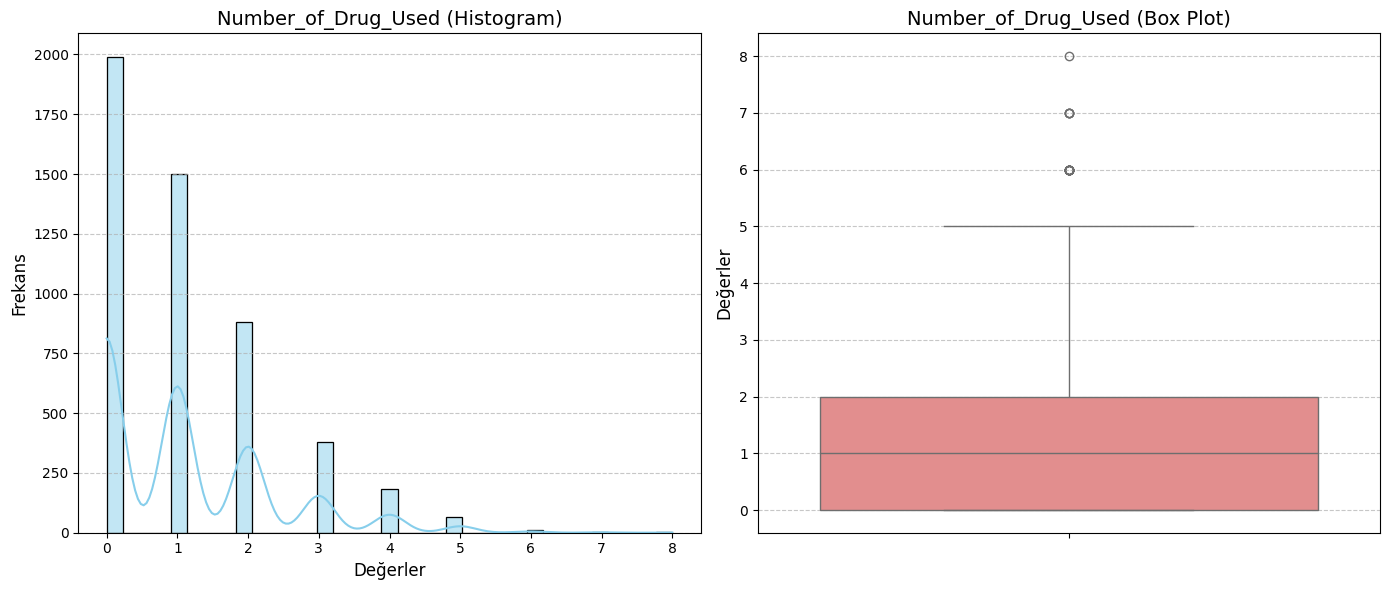

In [27]:
histog_boxplot(df.Number_of_Drug_Used)

In [29]:
df.loc[df["Number_of_Drug_Used"] > 5, "Number_of_Drug_Used"] = df.Number_of_Drug_Used.median()

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Number_of_Drug_Used (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Number_of_Drug_Used (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

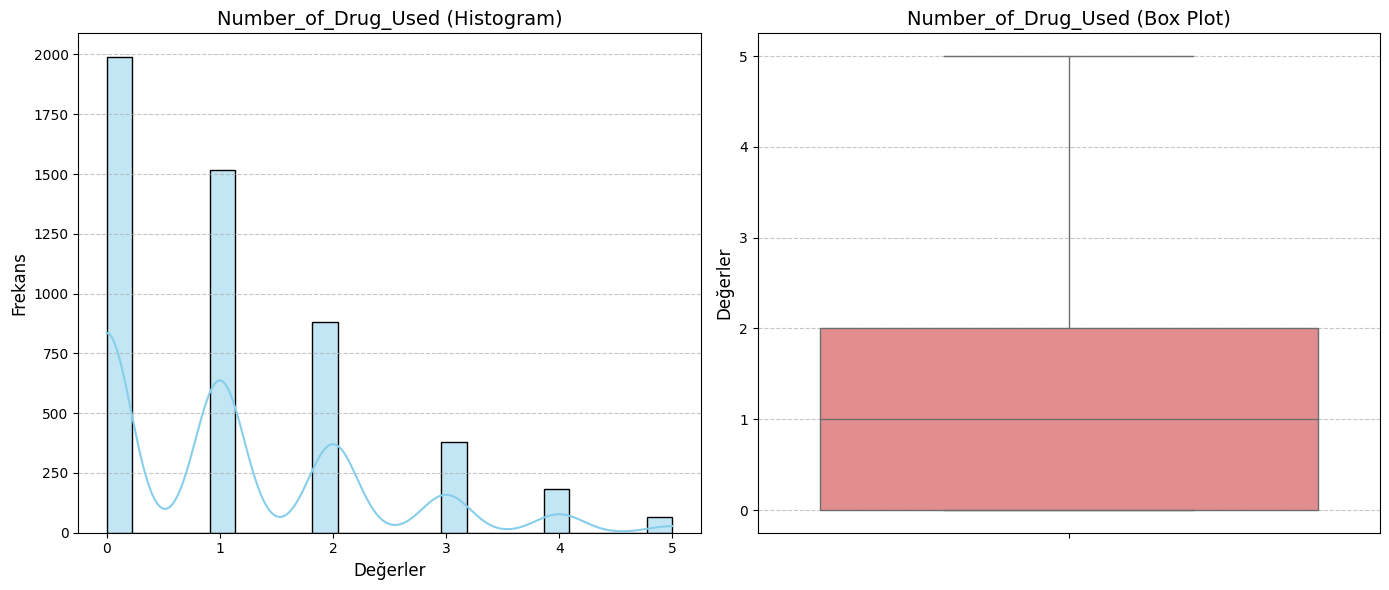

In [30]:
histog_boxplot(df.Number_of_Drug_Used)

In [31]:
df.columns

Index(['Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP', 'Chronic_Diseases',
       'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Job', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [40]:
df.to_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_9.xlsx',index=False)

In [41]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_9.xlsx',index_col=0)